In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from scipy.stats import boxcox

# Setting environment to ignore future warnings
import warnings
warnings.simplefilter('ignore')

In [3]:
# Loading the Dataset
parkinson_data = pd.read_csv('po2_data.csv')
parkinson_data.head()

,subject#,age,sex,test_time,motor_updrs,total_updrs,jitter(%),jitter(abs),jitter(rap),jitter(ppq5),...,shimmer(abs),shimmer(apq3),shimmer(apq5),shimmer(apq11),shimmer(dda),nhr,hnr,rpde,dfa,ppe
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


## Data Exploration

--> Checking for missing values <br>
--> Obtaining statistical summaries for the dataset <br>
--> Visualizing distributions of key variables

In [4]:
# Function to perform all EDA
def perform_eda(df, name=""):
    # Printing basic detail of data like name, size, shape
    print(f"EDA of {str(name)} Data....")
    print(f"Size {df.size}")
    print(f"Columns {df.shape[1]}")
    print(f"Records {df.shape[0]}")
    print("="*50)
    
    # Printing top 5 records of data
    print("First Look of Data....")
    display(df.head())
    print("="*50)
    
    # Getting Numerical and Categorical columns Separately
    cat_cols = df.select_dtypes(object).columns
    num_cols = df.select_dtypes(np.number).columns

    # Printing the Numerical columns
    print("Dataset has following Numerical columns...")
    for i, j in enumerate(num_cols):
        print(f" {i+1}) {j}")

    # Printing the Categorical columns
    print("\n\nDataset has following Categorical columns...")
    for i, j in enumerate(cat_cols):
        print(f" {i+1}) {j}")
    
    # Printing info of data like data type, non null values
    print("="*50)
    print("Information of Data....")
    print(df.info())
    print("="*50)
    
    # Displaying statistical properties of data like mean, median, max, min
    print("Statistical Properties of Data....")
    display(df.describe(include="all"))
    print("="*50)

In [5]:
perform_eda(parkinson_data, "Parkinson Disease")

EDA of Parkinson Disease Data....
Size 129250
Columns 22
Records 5875
First Look of Data....


,subject#,age,sex,test_time,motor_updrs,total_updrs,jitter(%),jitter(abs),jitter(rap),jitter(ppq5),...,shimmer(abs),shimmer(apq3),shimmer(apq5),shimmer(apq11),shimmer(dda),nhr,hnr,rpde,dfa,ppe
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


Dataset has following Numerical columns...
 1) subject#
 2) age
 3) sex
 4) test_time
 5) motor_updrs
 6) total_updrs
 7) jitter(%)
 8) jitter(abs)
 9) jitter(rap)
 10) jitter(ppq5)
 11) jitter(ddp)
 12) shimmer(%)
 13) shimmer(abs)
 14) shimmer(apq3)
 15) shimmer(apq5)
 16) shimmer(apq11)
 17) shimmer(dda)
 18) nhr
 19) hnr
 20) rpde
 21) dfa
 22) ppe


Dataset has following Categorical columns...
Information of Data....
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   subject#        5875 non-null   int64  
 1   age             5875 non-null   int64  
 2   sex             5875 non-null   int64  
 3   test_time       5875 non-null   float64
 4   motor_updrs     5875 non-null   float64
 5   total_updrs     5875 non-null   float64
 6   jitter(%)       5875 non-null   float64
 7   jitter(abs)     5875 non-null   float64
 8   jitter(rap) 

,subject#,age,sex,test_time,motor_updrs,total_updrs,jitter(%),jitter(abs),jitter(rap),jitter(ppq5),...,shimmer(abs),shimmer(apq3),shimmer(apq5),shimmer(apq11),shimmer(dda),nhr,hnr,rpde,dfa,ppe
count,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,...,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000
mean,21.494128,64.804936,0.317787,92.863722,21.296229,29.018942,0.006154,0.000044,0.002987,0.003277,...,0.310960,0.017156,0.020144,0.027481,0.051467,0.032120,21.679495,0.541473,0.653240,0.219589
std,12.372279,8.821524,0.465656,53.445602,8.129282,10.700283,0.005624,0.000036,0.003124,0.003732,...,0.230254,0.013237,0.016664,0.019986,0.039711,0.059692,4.291096,0.100986,0.070902,0.091498
min,1.000000,36.000000,0.000000,-4.262500,5.037700,7.000000,0.000830,0.000002,0.000330,0.000430,...,0.026000,0.001610,0.001940,0.002490,0.004840,0.000286,1.659000,0.151020,0.514040,0.021983
25%,10.000000,58.000000,0.000000,46.847500,15.000000,21.371000,0.003580,0.000022,0.001580,0.001820,...,0.175000,0.009280,0.010790,0.015665,0.027830,0.010955,19.406000,0.469785,0.596180,0.156340
50%,22.000000,65.000000,0.000000,91.523000,20.871000,27.576000,0.004900,0.000035,0.002250,0.002490,...,0.253000,0.013700,0.015940,0.022710,0.041110,0.018448,21.920000,0.542250,0.643600,0.205500
75%,33.000000,72.000000,1.000000,138.445000,27.596500,36.399000,0.006800,0.000053,0.003290,0.003460,...,0.365000,0.020575,0.023755,0.032715,0.061735,0.031463,24.444000,0.614045,0.711335,0.264490
max,42.000000,85.000000,1.000000,215.490000,39.511000,54.992000,0.099990,0.000446,0.057540,0.069560,...,2.107000,0.162670,0.167020,0.275460,0.488020,0.748260,37.875000,0.966080,0.865600,0.731730


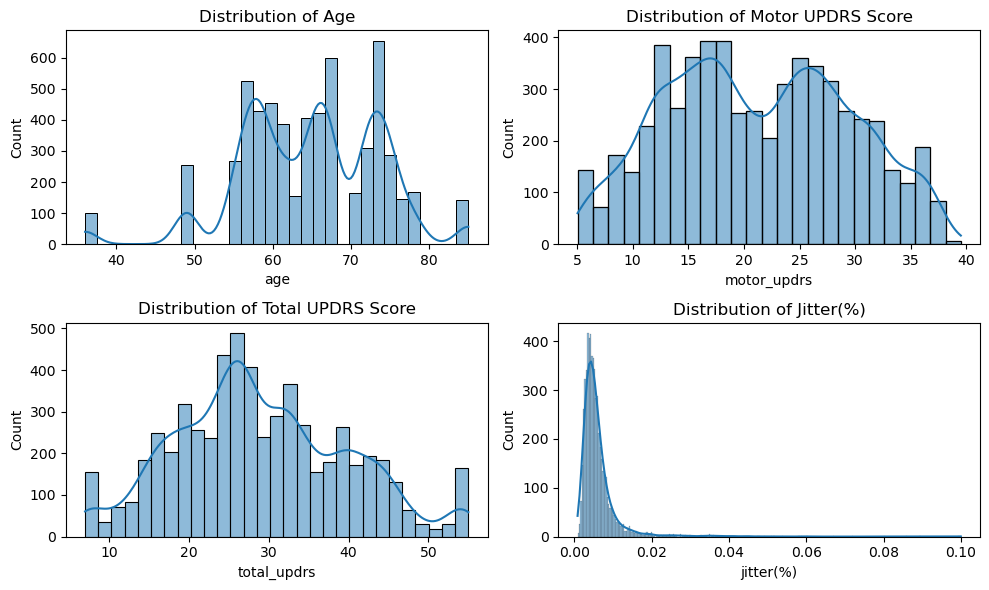

In [45]:
# Set up the figure and axes
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))

# Plot the distribution of age
sns.histplot(parkinson_data['age'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Age')

# Plot the distribution of motor_updrs
sns.histplot(parkinson_data['motor_updrs'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Motor UPDRS Score')

# Plot the distribution of total_updrs
sns.histplot(parkinson_data['total_updrs'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Total UPDRS Score')

# Plot the distribution of a voice measure (e.g., jitter(%))
sns.histplot(parkinson_data['jitter(%)'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Jitter(%)')

plt.tight_layout()
plt.show()

__Distribution of Age__: The age distribution appears to be somewhat uniform, with a slight increase in the number of subjects around the ages of 60-70.<br>
__Distribution of Motor UPDRS Score__: The motor UPDRS scores seem to have a relatively normal distribution, centered around 20.<br>
__Distribution of Total UPDRS Score__: The total UPDRS scores are slightly right-skewed, with a mode around the 25-30 range.<br>
__Distribution of Jitter(%)__: The jitter distribution is right-skewed, with most values close to 0. A few outliers have high jitter values.

## Data Visualization

- __Plot the Relationships Between Predictors and Target Variables__

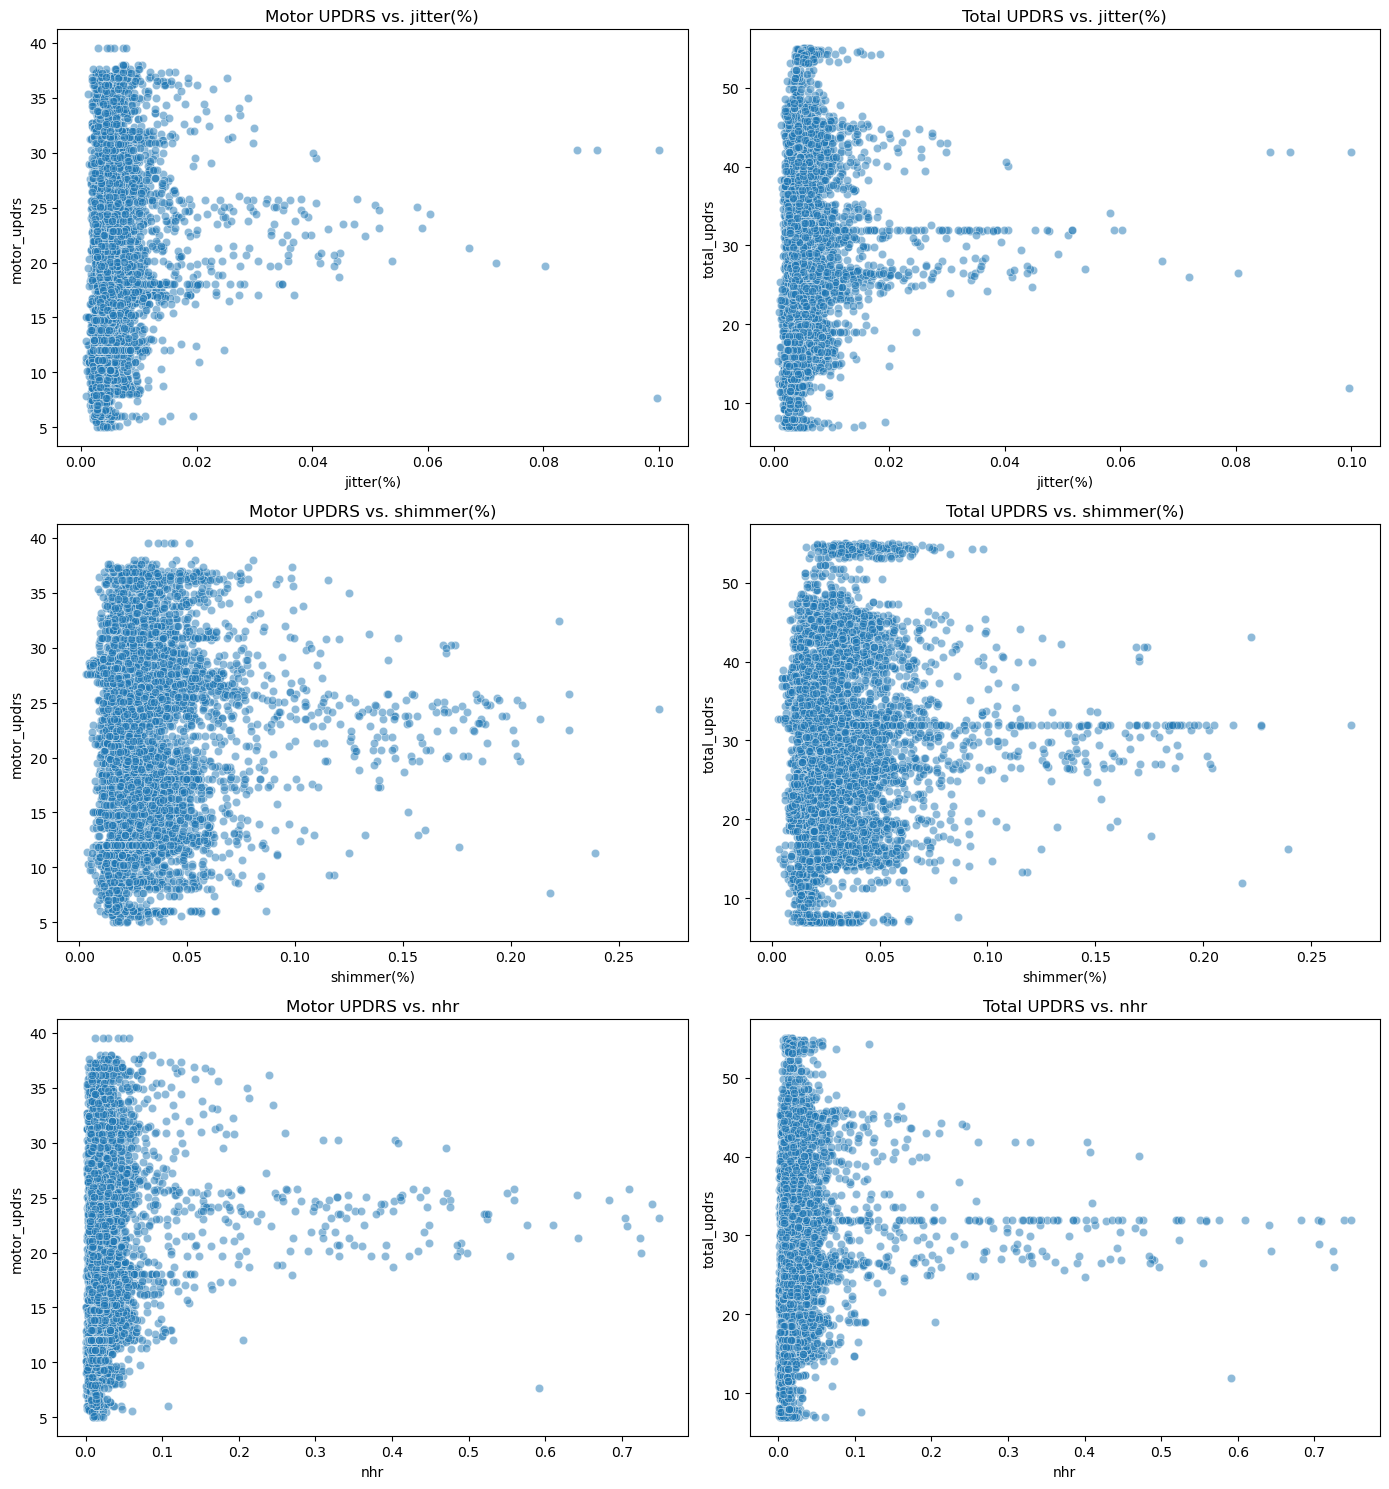

In [46]:
# Set up the figure and axes
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 15))

# Voice measures to visualize
voice_measures = ['jitter(%)', 'shimmer(%)', 'nhr']

# Plot scatter plots for voice measures against motor_updrs and total_updrs
for i, measure in enumerate(voice_measures):
    sns.scatterplot(x=measure, y='motor_updrs', data=parkinson_data, ax=axes[i, 0], alpha=0.5)
    axes[i, 0].set_title(f'Motor UPDRS vs. {measure}')
    
    sns.scatterplot(x=measure, y='total_updrs', data=parkinson_data, ax=axes[i, 1], alpha=0.5)
    axes[i, 1].set_title(f'Total UPDRS vs. {measure}')

plt.tight_layout()
plt.show()

__Jitter(%):__ Higher values of jitter seem to be associated with higher UPDRS scores, but the relationship is not strongly linear.<br>
__Shimmer(%):__ Similarly, higher shimmer values tend to be associated with higher UPDRS scores. This relationship seems to be more pronounced for the total UPDRS scores.<br>
__NHR (Noise-to-Harmonics Ratio):__ The majority of data points are clustered at the lower end, with a few outliers at the higher end. It's harder to determine a clear relationship with UPDRS scores from this visualization.

- __Correlation Matrix__

In [47]:
# Compute the correlation matrix
correlation_matrix = parkinson_data.corr()

# Focus on correlations of voice measures with motor_updrs and total_updrs
correlations_with_updrs = correlation_matrix[['motor_updrs', 'total_updrs']].sort_values(by='total_updrs', ascending=False)

# Display the correlations
correlations_with_updrs

,motor_updrs,total_updrs
total_updrs,0.947231,1.000000
motor_updrs,1.000000,0.947231
age,0.273665,0.310290
subject#,0.252919,0.253643
rpde,0.128607,0.156897
ppe,0.162433,0.156195
shimmer(apq11),0.136560,0.120838
shimmer(abs),0.110076,0.098790
shimmer(%),0.102349,0.092141
shimmer(apq5),0.092105,0.083467


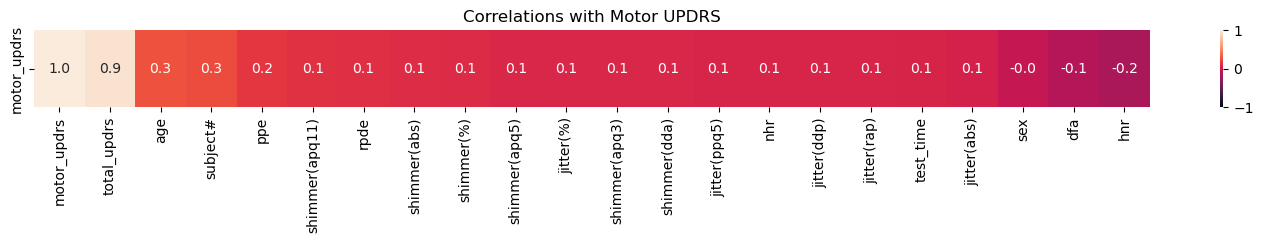

In [48]:
# Set up the figure for motor_updrs
plt.figure(figsize=(18, 1))

# Plot horizontal heatmap for correlations with motor_updrs
sns.heatmap(correlation_matrix[['motor_updrs']].sort_values(by='motor_updrs', ascending=False).T, fmt='.1f',
            annot=True, cmap='rocket', vmin=-1, vmax=1, cbar_kws={"orientation": "vertical"})

# Set the title
plt.title('Correlations with Motor UPDRS')
plt.show()

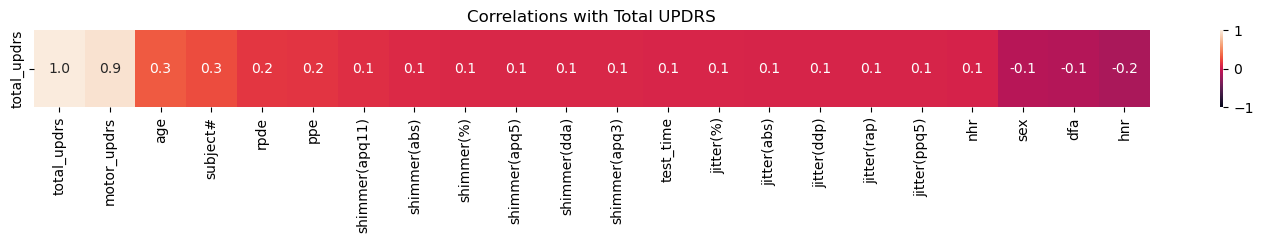

In [49]:
# Set up the figure for total_updrs
plt.figure(figsize=(18, 1))

# Plot vertical heatmap for correlations with total_updrs
sns.heatmap(correlation_matrix[['total_updrs']].sort_values(by='total_updrs', ascending=False).T, fmt='.1f',
            annot=True, cmap='rocket', vmin=-1, vmax=1, cbar_kws={"orientation": "vertical"})

# Set the title
plt.title('Correlations with Total UPDRS')
plt.show()

## Data Preparation & Modeling

In [50]:
def data_preparation(data, target, test_size):
    # Splitting the data into training and test sets for motor_updrs
    X_train_motor, X_test_motor, y_train_motor, y_test_motor = train_test_split(
        data, target, test_size=test_size, random_state=42)
    
    # Initialize the standard scaler
    scaler = StandardScaler()

    # Fit the scaler on the training data and transform both training and test data for motor_updrs
    X_train_scaled = scaler.fit_transform(X_train_motor)
    X_test_scaled = scaler.transform(X_test_motor)


    # Checking the mean and standard deviation of the scaled training data for motor_updrs
    X_train_scaled.mean(axis=0)

    return X_train_scaled, X_test_scaled, y_train_motor, y_test_motor

In [51]:
def train_Linear_Regression(xTrain, xTest, yTrain, yTest):
    # Initialize the linear regression model
    lr = LinearRegression()

    # Train the model on the scaled training data for motor_updrs
    lr.fit(X_train, y_train)

    # Predict on the test data
    y_pred = lr.predict(X_test)

    # Evaluate the model's performance
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse**0.5
    nrmse = rmse / (y_test.max() - y_test.min())
    r2 = r2_score(y_test, y_pred)
    adjusted_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

    return mae, mse, rmse, nrmse, r2, adjusted_r2

In [52]:
# Features (excluding target variables and identifiers)
features = parkinson_data.drop(columns=['subject#', 'motor_updrs', 'total_updrs'])

# Targets
motor_updrs_target = parkinson_data['motor_updrs']
total_updrs_target = parkinson_data['total_updrs']

## Task 1

- __Motor UPDRS__

In [53]:
X_train, X_test, y_train, y_test = data_preparation(features, motor_updrs_target, 0.2)

In [54]:
mae, mse, rmse, nrmse, r2, adjusted_r2 = train_Linear_Regression(X_train, X_test, y_train, y_test)

In [55]:
print("*"*50)
print("Mean Absolute Error: ", round(mae, 2))
print("Mean Squre Error: ", round(mse ,2))
print("Root Mean Square Error: ", round(rmse, 2))
print("Normalizaed Root Mean Square Error: ", round(nrmse, 2))
print("R2 Score: ", round(r2, 2))
print("Adjusted R2 Score: ", round(adjusted_r2, 2))
print("*"*50)

**************************************************
Mean Absolute Error:  6.35
Mean Squre Error:  56.01
Root Mean Square Error:  7.48
Normalizaed Root Mean Square Error:  0.23
R2 Score:  0.12
Adjusted R2 Score:  0.11
**************************************************


- __Total UPDRs__

In [56]:
X_train, X_test, y_train, y_test = data_preparation(features, total_updrs_target, 0.2)

In [57]:
mae, mse, rmse, nrmse, r2, adjusted_r2 = train_Linear_Regression(X_train, X_test, y_train, y_test)

In [1]:
print("*"*50)
print("Mean Absolute Error: ", round(mae, 2))
print("Mean Squre Error: ", round(mse ,2))
print("Root Mean Square Error: ", round(rmse, 2))
print("Normalizaed Root Mean Square Error: ", round(nrmse, 2))
print("R2 Score: ", round(r2, 2))
print("Adjusted R2 Score: ", round(adjusted_r2, 2))
print("*"*50)

**************************************************


NameError: name 'mae' is not defined

## Task 2

- __Motor UPDRS__

In [59]:
test_sizes = [0.5, 0.4, 0.3, 0.2]
for size in test_sizes:
    X_train, X_test, y_train, y_test = data_preparation(features, motor_updrs_target, size)
    mae, mse, rmse, nrmse, r2, adjusted_r2 = train_Linear_Regression(X_train, X_test, y_train, y_test)
    print("*"*25, f'Results for Test Size of {size*100}%', "*"*25)
    print("Mean Absolute Error: ", round(mae, 2))
    print("Mean Squre Error: ", round(mse ,2))
    print("Root Mean Square Error: ", round(rmse, 2))
    print("Normalizaed Root Mean Square Error: ", round(nrmse, 2))
    print("R2 Score: ", round(r2, 2))
    print("Adjusted R2 Score: ", round(adjusted_r2, 2))
    print("*"*80)
    print()

************************* Results for Test Size of 50.0% *************************
Mean Absolute Error:  6.26
Mean Squre Error:  55.05
Root Mean Square Error:  7.42
Normalizaed Root Mean Square Error:  0.22
R2 Score:  0.15
Adjusted R2 Score:  0.15
********************************************************************************

************************* Results for Test Size of 40.0% *************************
Mean Absolute Error:  6.21
Mean Squre Error:  54.24
Root Mean Square Error:  7.36
Normalizaed Root Mean Square Error:  0.21
R2 Score:  0.15
Adjusted R2 Score:  0.15
********************************************************************************

************************* Results for Test Size of 30.0% *************************
Mean Absolute Error:  6.3
Mean Squre Error:  55.5
Root Mean Square Error:  7.45
Normalizaed Root Mean Square Error:  0.22
R2 Score:  0.15
Adjusted R2 Score:  0.14
********************************************************************************

************

- __Total UPDRS__

In [60]:
test_sizes = [0.5, 0.4, 0.3, 0.2]
for size in test_sizes:
    X_train, X_test, y_train, y_test = data_preparation(features, total_updrs_target, size)
    mae, mse, rmse, nrmse, r2, adjusted_r2 = train_Linear_Regression(X_train, X_test, y_train, y_test)
    print("*"*25, f'Results for Test Size of {size*100}%', "*"*25)
    print("Mean Absolute Error: ", round(mae, 2))
    print("Mean Squre Error: ", round(mse ,2))
    print("Root Mean Square Error: ", round(rmse, 2))
    print("Normalizaed Root Mean Square Error: ", round(nrmse, 2))
    print("R2 Score: ", round(r2, 2))
    print("Adjusted R2 Score: ", round(adjusted_r2, 2))
    print("*"*80)
    print()

************************* Results for Test Size of 50.0% *************************
Mean Absolute Error:  7.94
Mean Squre Error:  91.7
Root Mean Square Error:  9.58
Normalizaed Root Mean Square Error:  0.2
R2 Score:  0.18
Adjusted R2 Score:  0.17
********************************************************************************

************************* Results for Test Size of 40.0% *************************
Mean Absolute Error:  7.87
Mean Squre Error:  90.11
Root Mean Square Error:  9.49
Normalizaed Root Mean Square Error:  0.2
R2 Score:  0.18
Adjusted R2 Score:  0.18
********************************************************************************

************************* Results for Test Size of 30.0% *************************
Mean Absolute Error:  7.97
Mean Squre Error:  92.23
Root Mean Square Error:  9.6
Normalizaed Root Mean Square Error:  0.2
R2 Score:  0.18
Adjusted R2 Score:  0.17
********************************************************************************

***************

## Task 3

- __Log Transform__ & __Collinearity Analysis__ for __Motor UPDRS__

In [61]:
X_train, X_test, y_train, y_test = data_preparation(features, motor_updrs_target, 0.2)

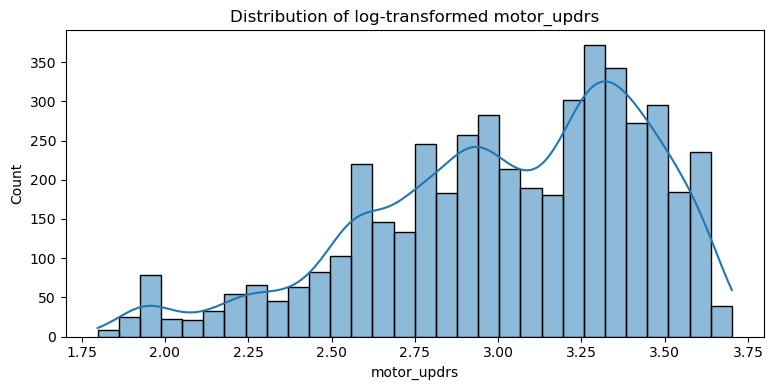

In [62]:
# Apply log-transform to the target variables
y_train = np.log1p(y_train)
y_test = np.log1p(y_test)

# Visualize the distributions after log-transform
plt.figure(figsize=(15, 4))

# Plot the distribution of log-transformed motor_updrs
plt.subplot(1, 2, 1)
sns.histplot(y_train, kde=True, bins=30)
plt.title('Distribution of log-transformed motor_updrs')

plt.tight_layout()
plt.show()

In [63]:
# Calculate VIF for each feature
X_with_const = sm.add_constant(X_train)  # Adding a constant for the intercept term
# Correcting the VIF computation
vif_data = pd.DataFrame()
vif_data["Feature"] = features.columns
vif_data["VIF"] = [variance_inflation_factor(X_train, i) for i in range(X_train.shape[1])]

vif_data.sort_values(by="VIF", ascending=False)

,Feature,VIF
10,shimmer(apq3),2.360183e+07
13,shimmer(dda),2.360160e+07
7,jitter(ddp),1.199247e+06
5,jitter(rap),1.198870e+06
8,shimmer(%),1.668872e+02
3,jitter(%),8.803692e+01
9,shimmer(abs),7.239515e+01
11,shimmer(apq5),5.772790e+01
6,jitter(ppq5),3.165987e+01
12,shimmer(apq11),1.639108e+01


In [64]:
# Features to be removed based on high VIF values
features_to_remove = vif_data[vif_data["VIF"] > 10]["Feature"].tolist()

# Removing these features from our datasets
X_train = pd.DataFrame(X_train, columns=features.columns).drop(columns=features_to_remove)
X_test = pd.DataFrame(X_test, columns=features.columns).drop(columns=features_to_remove)

In [65]:
mae, mse, rmse, nrmse, r2, adjusted_r2 = train_Linear_Regression(X_train, X_test, y_train, y_test)

In [66]:
print("*"*50)
print("Mean Absolute Error: ", round(mae, 2))
print("Mean Squre Error: ", round(mse ,2))
print("Root Mean Square Error: ", round(rmse, 2))
print("Normalizaed Root Mean Square Error: ", round(nrmse, 2))
print("R2 Score: ", round(r2, 2))
print("Adjusted R2 Score: ", round(adjusted_r2, 2))
print("*"*50)

**************************************************
Mean Absolute Error:  0.31
Mean Squre Error:  0.14
Root Mean Square Error:  0.38
Normalizaed Root Mean Square Error:  0.2
R2 Score:  0.13
Adjusted R2 Score:  0.12
**************************************************


- __Log Transform__ & __Collinearity Analysis__ for __Total UPDRS__

In [67]:
X_train, X_test, y_train, y_test = data_preparation(features, total_updrs_target, 0.2)

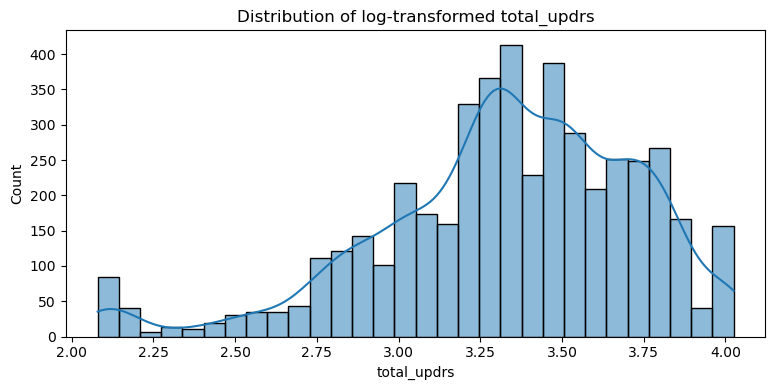

In [68]:
# Apply log-transform to the target variables
y_train = np.log1p(y_train)
y_test = np.log1p(y_test)

# Visualize the distributions after log-transform
plt.figure(figsize=(15, 4))

# Plot the distribution of log-transformed motor_updrs
plt.subplot(1, 2, 1)
sns.histplot(y_train, kde=True, bins=30)
plt.title('Distribution of log-transformed total_updrs')

plt.tight_layout()
plt.show()

In [69]:
# Calculate VIF for each feature
X_with_const = sm.add_constant(X_train)  # Adding a constant for the intercept term
# Correcting the VIF computation
vif_data = pd.DataFrame()
vif_data["Feature"] = features.columns
vif_data["VIF"] = [variance_inflation_factor(X_train, i) for i in range(X_train.shape[1])]

vif_data.sort_values(by="VIF", ascending=False)

,Feature,VIF
10,shimmer(apq3),2.360183e+07
13,shimmer(dda),2.360160e+07
7,jitter(ddp),1.199247e+06
5,jitter(rap),1.198870e+06
8,shimmer(%),1.668872e+02
3,jitter(%),8.803692e+01
9,shimmer(abs),7.239515e+01
11,shimmer(apq5),5.772790e+01
6,jitter(ppq5),3.165987e+01
12,shimmer(apq11),1.639108e+01


In [70]:
# Features to be removed based on high VIF values
features_to_remove = vif_data[vif_data["VIF"] > 10]["Feature"].tolist()

# Removing these features from our datasets
X_train = pd.DataFrame(X_train, columns=features.columns).drop(columns=features_to_remove)
X_test = pd.DataFrame(X_test, columns=features.columns).drop(columns=features_to_remove)

In [71]:
print("*"*50)
print("Mean Absolute Error: ", round(mae, 2))
print("Mean Squre Error: ", round(mse ,2))
print("Root Mean Square Error: ", round(rmse, 2))
print("Normalizaed Root Mean Square Error: ", round(nrmse, 2))
print("R2 Score: ", round(r2, 2))
print("Adjusted R2 Score: ", round(adjusted_r2, 2))
print("*"*50)

**************************************************
Mean Absolute Error:  0.31
Mean Squre Error:  0.14
Root Mean Square Error:  0.38
Normalizaed Root Mean Square Error:  0.2
R2 Score:  0.13
Adjusted R2 Score:  0.12
**************************************************


## Task 4

- __Gaussian Transformation__ for __Motor UpDrs__

In [72]:
X_train, X_test, y_train, y_test = data_preparation(features, motor_updrs_target, 0.2)

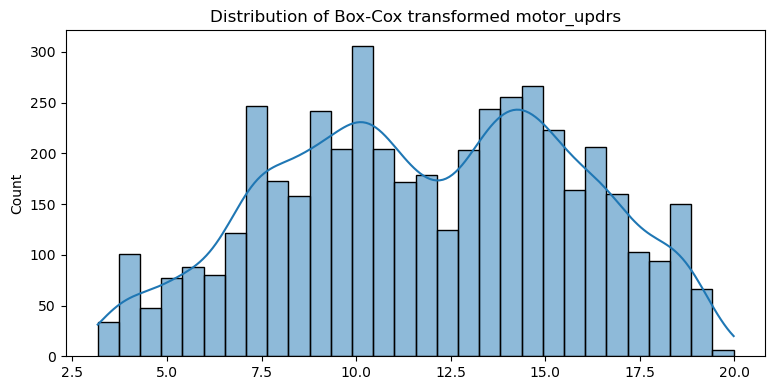

In [73]:
# Applying Box-Cox transformation
y_train, motor_lambda = boxcox(y_train)
y_test = boxcox(y_test, lmbda=motor_lambda)

# Visualize the distributions after Box-Cox transformation
plt.figure(figsize=(15, 4))

# Plot the distribution of Box-Cox transformed motor_updrs
plt.subplot(1, 2, 1)
sns.histplot(y_train, kde=True, bins=30)
plt.title('Distribution of Box-Cox transformed motor_updrs')

plt.tight_layout()
plt.show()

In [74]:
mae, mse, rmse, nrmse, r2, adjusted_r2 = train_Linear_Regression(X_train, X_test, y_train, y_test)

In [75]:
print("*"*50)
print("Mean Absolute Error: ", round(mae, 2))
print("Mean Squre Error: ", round(mse ,2))
print("Root Mean Square Error: ", round(rmse, 2))
print("Normalizaed Root Mean Square Error: ", round(nrmse, 2))
print("R2 Score: ", round(r2, 2))
print("Adjusted R2 Score: ", round(adjusted_r2, 2))
print("*"*50)

**************************************************
Mean Absolute Error:  3.04
Mean Squre Error:  12.91
Root Mean Square Error:  3.59
Normalizaed Root Mean Square Error:  0.22
R2 Score:  0.13
Adjusted R2 Score:  0.11
**************************************************


- __Gaussian Transformation__ for __Total UpDrs__

In [76]:
X_train, X_test, y_train, y_test = data_preparation(features, total_updrs_target, 0.2)

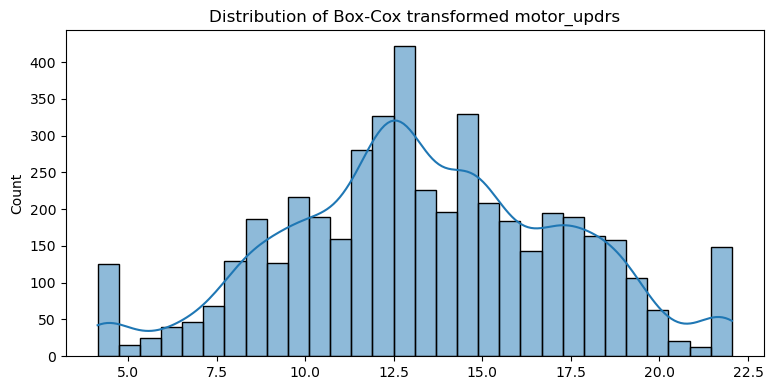

In [77]:
# Applying Box-Cox transformation
y_train, motor_lambda = boxcox(y_train)
y_test = boxcox(y_test, lmbda=motor_lambda)

# Visualize the distributions after Box-Cox transformation
plt.figure(figsize=(15, 4))

# Plot the distribution of Box-Cox transformed motor_updrs
plt.subplot(1, 2, 1)
sns.histplot(y_train, kde=True, bins=30)
plt.title('Distribution of Box-Cox transformed motor_updrs')

plt.tight_layout()
plt.show()

In [78]:
mae, mse, rmse, nrmse, r2, adjusted_r2 = train_Linear_Regression(X_train, X_test, y_train, y_test)

In [79]:
print("*"*50)
print("Mean Absolute Error: ", round(mae, 2))
print("Mean Squre Error: ", round(mse ,2))
print("Root Mean Square Error: ", round(rmse, 2))
print("Normalizaed Root Mean Square Error: ", round(nrmse, 2))
print("R2 Score: ", round(r2, 2))
print("Adjusted R2 Score: ", round(adjusted_r2, 2))
print("*"*50)

**************************************************
Mean Absolute Error:  2.92
Mean Squre Error:  12.36
Root Mean Square Error:  3.52
Normalizaed Root Mean Square Error:  0.2
R2 Score:  0.17
Adjusted R2 Score:  0.15
**************************************************
